# Python Implemetation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('breast cancer.csv',index_col = 0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [7]:
df = df.drop('Unnamed: 32',axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


seems no other cols have nulls.it's safe to proceed

As we can see each feature data scaled differently.Let's go ahead and scaled the data.


In [9]:
scaler = StandardScaler()
x = df.drop('diagnosis',axis = 1)
x_scaled = scaler.fit_transform(x)

# Principal Component Analysis(PCA)

In [10]:
pca = PCA()
pca.fit_transform(x_scaled)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

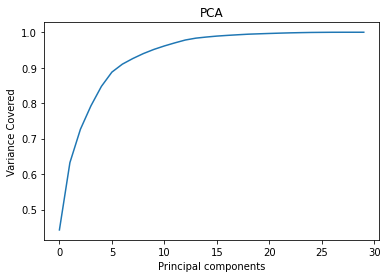

In [11]:
# Let's plot Scree plot to check the best componenets
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

Around 13 principal componenets are able to explain > 95% variance.its safe to consider starting 13 PC's

In [12]:
pca = PCA(n_components = 13)
new_pcomp = pca.fit_transform(x_scaled)
princi_comp = pd.DataFrame(new_pcomp,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877403,0.262955,-0.859016,0.103382
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240989,-0.711905,1.106995,0.813120,0.157924,-0.943529
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024065,0.454276,-0.605604,0.124386,-0.410625
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151513,1.011314,-0.933272
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651359,-0.110518,0.387944
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,-0.062651,0.123339,-0.051723
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108631,0.244804,0.222757,-0.192630
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520878,-0.840511,0.096477,0.157424
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280238,-0.542035,-0.089298,-0.178629,-0.697476,1.225180


In [13]:
# Replace Label columns (diagnosis) into binary codes
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
y = df['diagnosis']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(princi_comp,y,test_size = 0.25,random_state = 355)

In [29]:
def print_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n===========Train Result===================')
        print(f'Accuracy Score: {accuracy_score(y_train,y_pred) *100:.2f}%')
    elif train == False:
            pred = clf.predict(x_test)
            print('\n=====================Test Result=====================')
            print(f'Accuracy Score: {accuracy_score(y_test,pred) *100:.2f}%')
            print('\nTest Classification Report\n',classification_report(y_test,pred,digits = 2))


In [30]:
from sklearn.svm import SVC
svc = SVC()
# svc model training and printing train and test score
svc.fit(x_train,y_train)
#  call the function and pass the dataset to check train and test score
print_score(svc,x_train,x_test,y_train,y_test,train = True)
print_score(svc,x_train,x_test,y_train,y_test,train = False)


===========Train Result===================
Accuracy Score: 98.12%

=====================Test Result=====================
Accuracy Score: 97.90%

Test Classification Report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier()
# GBDT model training and printing train and test score
gbdt.fit(x_train,y_train)
#  call the function and pass the dataset to check train and test score
print_score(gbdt,x_train,x_test,y_train,y_test,train = True)
print_score(gbdt,x_train,x_test,y_train,y_test,train = False)


===========Train Result===================
Accuracy Score: 100.00%

=====================Test Result=====================
Accuracy Score: 95.10%

Test Classification Report
               precision    recall  f1-score   support

           0       0.96      0.97      0.96        93
           1       0.94      0.92      0.93        50

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random Forest model training and printing train and test score
rf.fit(x_train,y_train)
#  call the function and pass the dataset to check train and test score
print_score(rf,x_train,x_test,y_train,y_test,train = True)
print_score(rf,x_train,x_test,y_train,y_test,train = False)


===========Train Result===================
Accuracy Score: 100.00%

=====================Test Result=====================
Accuracy Score: 95.80%

Test Classification Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        93
           1       0.94      0.94      0.94        50

    accuracy                           0.96       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# C      = It is hypermeter in svm to control error.How much error we allow.
#          Low C means allowing less number of errors
#          Large C means allowing more number of errors.
# gamma = Gamma decides that how much curvature we want on a decision boundary.Gamma high means more curvature
#         Gamma low means less curvature.
param_grid = {'C': [1,5,10,20],
              'gamma': [0.001,0.01,0.02,0.002]
             }

In [35]:
gridsearch = GridSearchCV(svc,param_grid)
gridsearch.fit(x_train,y_train)
# best param
gridsearch.best_params_

{'C': 5, 'gamma': 0.01}

In [36]:
# svc model training and printing train and test score
svc = SVC(C = 5,gamma = 0.01)
svc.fit(x_train,y_train)
#  call the function and pass the dataset to check train and test score
print_score(svc,x_train,x_test,y_train,y_test,train = True)
print_score(svc,x_train,x_test,y_train,y_test,train = False)


===========Train Result===================
Accuracy Score: 98.12%

=====================Test Result=====================
Accuracy Score: 97.90%

Test Classification Report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



# Creating Pipeline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [38]:
df = pd.read_csv('breast cancer.csv',index_col = 0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [39]:
x = df.drop(['Unnamed: 32','diagnosis'],axis = 1)
y = df.diagnosis
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 355)


In [40]:
pipe = Pipeline([('Scaler',StandardScaler()), # Fit_transform
                 ('PCA',PCA(n_components = 13)), # fit_transform
                 ('SVM',SVC(C = 5,gamma = 0.01))]) # only fit

In [44]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=13)),
                ('SVM', SVC(C=5, gamma=0.01))])

In [45]:
y_pred = pipe.predict(x_test)

In [46]:
accuracy_score(y_test,y_pred)

0.9790209790209791